**Sample project for Color detection**

Dominant Color (BGR): (np.int64(67), np.int64(109), np.int64(127))


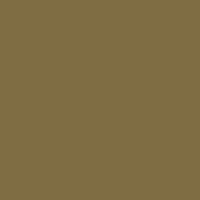

Original Image vs Yellow Detection:


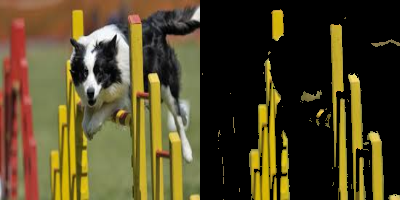

Original Image vs Orange Detection:


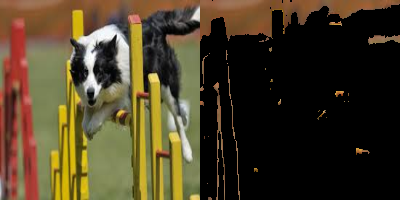

Original Image vs White Detection:


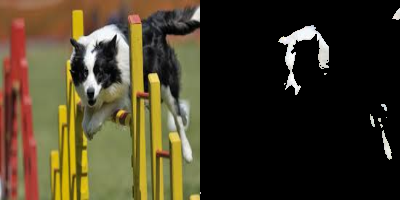

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_dominant_color(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image not found at {image_path}")
        resized_img = cv2.resize(img, (50, 50))  # Reduced size
        pixels = resized_img.reshape((-1, 3))
        pixels = np.float32(pixels)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        _, _, centers = cv2.kmeans(pixels, 1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        return tuple(centers[0].astype(int))
    except Exception as e:
        print(f"Error: {e}")
        return None

def display_color_swatch(color):
    if color is None:
        print("No color detected.")
        return
    swatch = np.zeros((200, 200, 3), dtype=np.uint8)
    swatch[:] = color
    print(f"Dominant Color (BGR): {color}")
    cv2_imshow(swatch)

def detect_color_range(image_path, lower_bound, upper_bound, color_name):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        img = cv2.resize(img, (200, 200))  # Decrease image size for processing
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower_bound, upper_bound)
        result = cv2.bitwise_and(img, img, mask=mask)

        print(f"Original Image vs {color_name} Detection:")
        combined = np.hstack((img, result))
        cv2_imshow(combined)
    except Exception as e:
        print(f"Error: {e}")

image_file = "/content/agility.jpeg"
dominant_color = detect_dominant_color(image_file)
display_color_swatch(dominant_color)

color_ranges = {
    "Yellow": (np.array([20, 100, 100]), np.array([30, 255, 255])),
    "Orange": (np.array([10, 100, 100]), np.array([20, 255, 255])),
    "White": (np.array([0, 0, 200]), np.array([180, 50, 255]))
}

for color_name, (lower, upper) in color_ranges.items():
    detect_color_range(image_file, lower, upper, color_name)


**Data structures for Image Analysis -Write a program that computes the T-pyramid of an image**

Level 0:


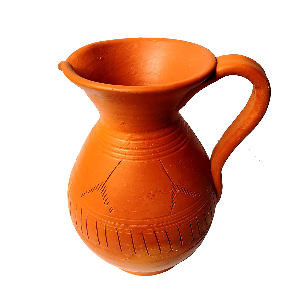

Level 1:


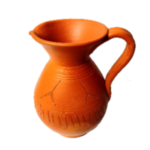

Level 2:


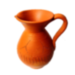

Level 3:


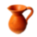

Level 4:


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def t_pyramid(image, levels):
    pyramid = [image.astype(np.float32)]
    for _ in range(levels - 1):
        blurred = cv2.GaussianBlur(pyramid[-1], (5, 5), 0)
        downsampled = cv2.resize(blurred, (pyramid[-1].shape[1] // 2, pyramid[-1].shape[0] // 2))  # Downsample
        pyramid.append(downsampled)
    return pyramid

def display_pyramid(pyramid):
    for i, level in enumerate(pyramid):
        normalized_level = cv2.normalize(level, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        print(f"Level {i}:")
        cv2_imshow(normalized_level)

image_path = "/content/jug.jpg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image not found at {image_path}")
else:
    image = cv2.resize(image, (300, 300))  # Reduce image size before processing
    pyramid = t_pyramid(image, 5)
    display_pyramid(pyramid)


**Sample project for Image Smoothing**

Original (Left) | Averaging Blur (Right):


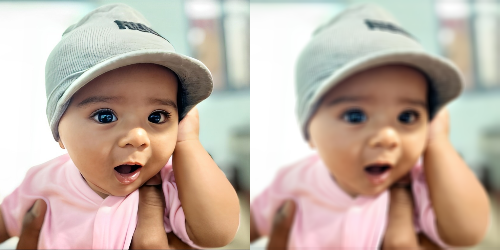

Original (Left) | Gaussian Blur (Right):


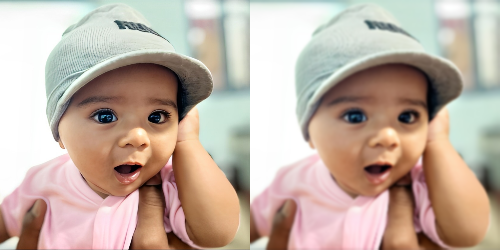

Original (Left) | Median Blur (Right):


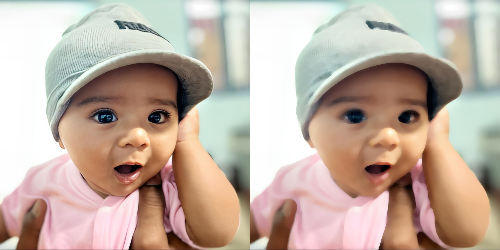

Original (Left) | Bilateral Filter (Right):


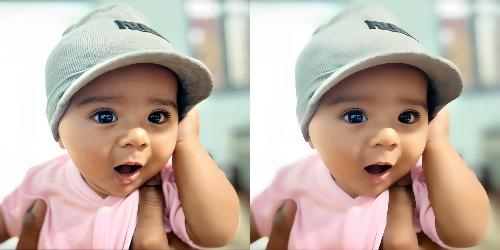

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def image_smoothing(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image not found at {image_path}")

        img = cv2.resize(img, (250, 250))  # Further reducing the image size

        blur = cv2.blur(img, (5, 5))
        gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
        median_blur = cv2.medianBlur(img, 5)
        bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)

        avg_stack = np.hstack((img, blur))
        gaussian_stack = np.hstack((img, gaussian_blur))
        median_stack = np.hstack((img, median_blur))
        bilateral_stack = np.hstack((img, bilateral_blur))

        print("Original (Left) | Averaging Blur (Right):")
        cv2_imshow(avg_stack)
        print("Original (Left) | Gaussian Blur (Right):")
        cv2_imshow(gaussian_stack)
        print("Original (Left) | Median Blur (Right):")
        cv2_imshow(median_stack)
        print("Original (Left) | Bilateral Filter (Right):")
        cv2_imshow(bilateral_stack)

    except Exception as e:
        print(f"Error: {e}")

image_file = "/content/jayansh.jpg"
image_smoothing(image_file)


**Sample project for Edge detection using Sobel ,Canny edge**

Original | Sobel | Canny (Kernel Size 3):


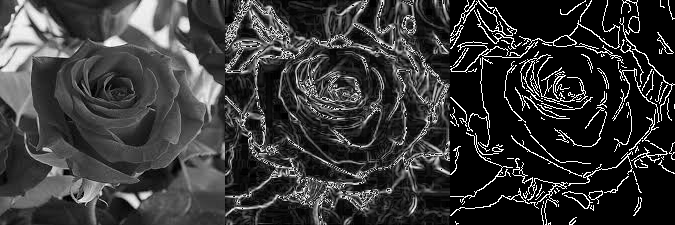

Original | Sobel | Canny (Kernel Size 5):


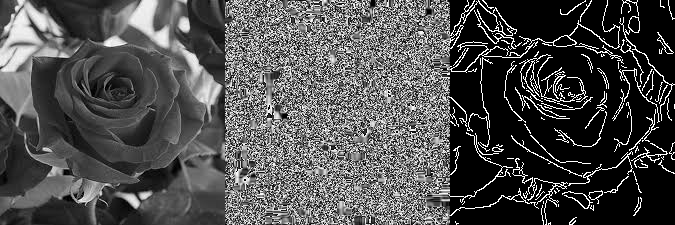

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def edge_detection(image_path, kernel_size=3):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise FileNotFoundError(f"Image not found at {image_path}")
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel_size)
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel_size)
        sobel_combined = np.sqrt(sobelx**2 + sobely**2)
        sobel_combined = np.uint8(sobel_combined)
        canny = cv2.Canny(img, 100, 200)
        combined = cv2.hconcat([img, sobel_combined, canny])
        print(f"Original | Sobel | Canny (Kernel Size {kernel_size}):")
        cv2_imshow(combined)
    except Exception as e:
        print(f"Error: {e}")
image_file = "/content/rose.jpg"
edge_detection(image_file, 3)
edge_detection(image_file, 5)

**Object Detection with OpenCV**
*   **Detect simple objects like faces, eyes, or hands using OpenCV and Haar cascade**
*   **Libraries: OpenCV, NumPy**


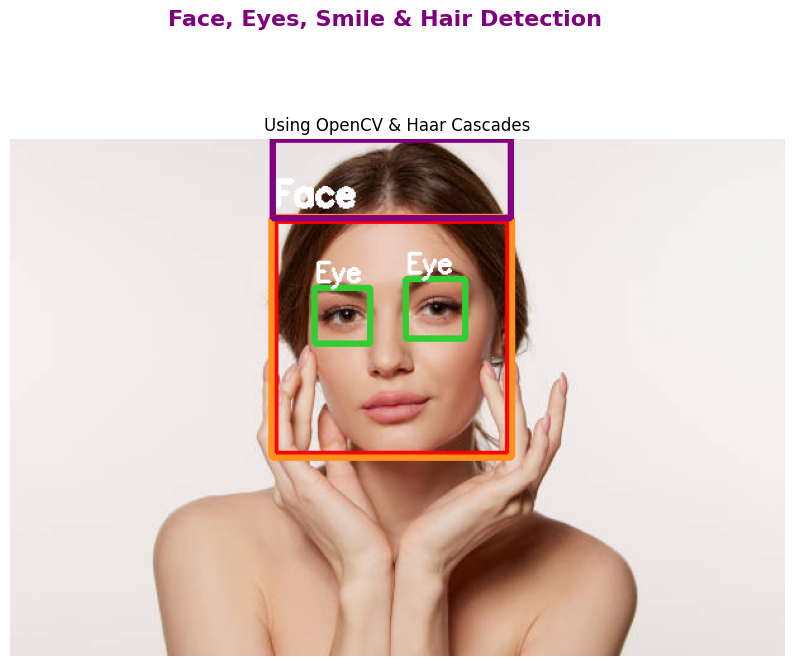

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
image_path = '/content/human.jpg'
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not found!")
    exit()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6, minSize=(50, 50))
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (30, 144, 255), 5)
    cv2.rectangle(image, (x + 3, y + 3), (x + w - 3, y + h - 3), (0, 0, 255), 2)
    cv2.putText(image, 'Face', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 3)
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (50, 205, 50), 3)
        cv2.putText(roi_color, 'Eye', (ex, ey - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=25, minSize=(25, 25))
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (255, 140, 0), 3)
        cv2.putText(roi_color, 'Smile', (sx, sy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    hair_region_y = max(0, y - h // 2)
    hair_region = gray[hair_region_y:y, x:x + w]
    hair_edges = cv2.Canny(hair_region, 50, 150)
    cv2.rectangle(image, (x, hair_region_y), (x + w, y), (128, 0, 128), 3)
    cv2.putText(image, 'Hair', (x, hair_region_y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis("off")
plt.suptitle("Face, Eyes, Smile & Hair Detection", fontsize=16, fontweight='bold', color='purple')
plt.title("Using OpenCV & Haar Cascades", fontsize=12, fontweight='medium', color='black')
plt.show()